In [54]:
import pandas as pd

In [55]:
column_names=['Id','Topic','Sentiment','Text']
df=pd.read_csv(r"C:\Users\91957\Downloads\twitter_training.csv",names=column_names)
df.drop('Id',axis=1,inplace=True)

In [56]:
df.head()

,Topic,Sentiment,Text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [57]:
df.Sentiment.value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

In [58]:
df.isnull().sum()

Topic          0
Sentiment      0
Text         686
dtype: int64

In [67]:
df.dropna(inplace=True)
df

,Topic,Sentiment,Text,preprocessed_text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,imgetborderlandmurder
1,Borderlands,Positive,I am coming to the borders and I will kill you...,comeborderkill
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,imgetborderlandkill
3,Borderlands,Positive,im coming on borderlands and i will murder you...,imcomeborderlandmurder
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,imgetborderlandmurder
...,...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...,realizwindowpartitmaclikeyearbehindnvidiadrive...
74678,Nvidia,Positive,Just realized that my Mac window partition is ...,realizmacwindowpartityearbehindnvidiadriveride...
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...,realizwindowpartitmacyearbehindnvidiadriveride...
74680,Nvidia,Positive,Just realized between the windows partition of...,realizwindowpartitmaclikeyearbehindnvidiadrive...


In [68]:
df.isnull().sum()

Topic                0
Sentiment            0
Text                 0
preprocessed_text    0
dtype: int64

In [69]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [70]:
stemmer=PorterStemmer()
stop_words=set(stopwords.words('english'))
def preprocess_text(text):
    text=re.sub(r'[^a-zA-Z\s]','',text,re.I|re.A)
    text=text.lower()
    tokens=text.split()
    tokens=[stemmer.stem(word) for word in tokens if word not in stop_words]
    return ''.join(tokens)
    

In [71]:
df['preprocessed_text']=df["Text"].apply(preprocess_text)
df[['Text','preprocessed_text']].head()

,Text,preprocessed_text
0,im getting on borderlands and i will murder yo...,imgetborderlandmurder
1,I am coming to the borders and I will kill you...,comeborderkill
2,im getting on borderlands and i will kill you ...,imgetborderlandkill
3,im coming on borderlands and i will murder you...,imcomeborderlandmurder
4,im getting on borderlands 2 and i will murder ...,imgetborderlandmurder


In [72]:
df.isnull().sum()

Topic                0
Sentiment            0
Text                 0
preprocessed_text    0
dtype: int64

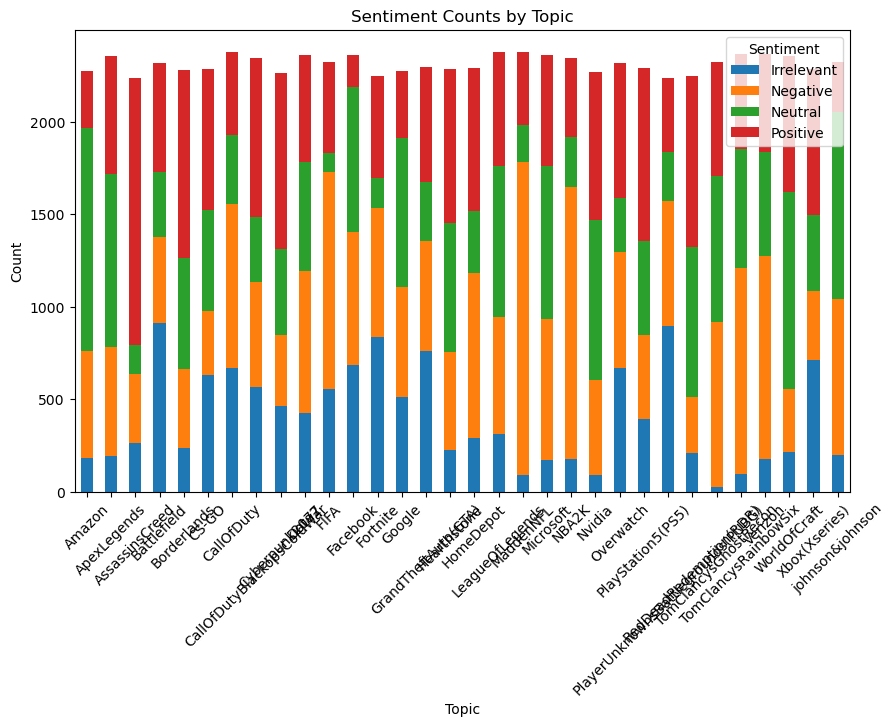

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
#Bar Chart
sentiment_counts=df.groupby(['Topic','Sentiment']).size().unstack().fillna(0)
sentiment_counts
sentiment_counts.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Sentiment Counts by Topic')
plt.xlabel("Topic")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()




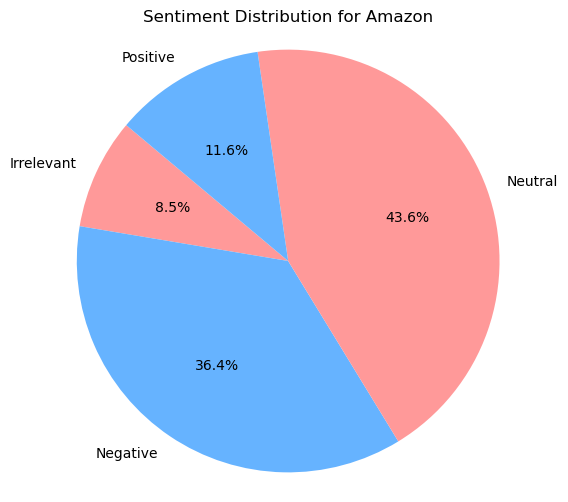

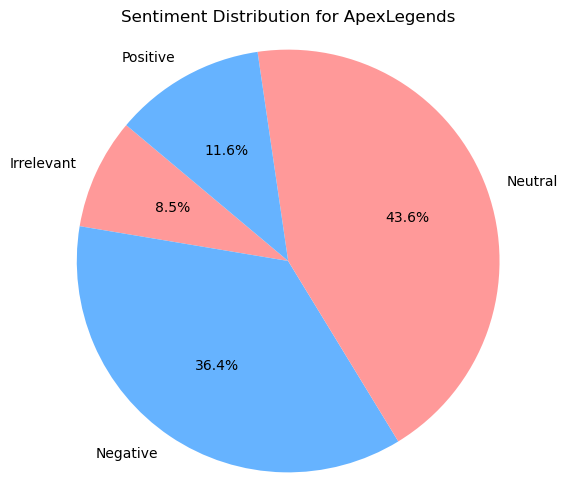

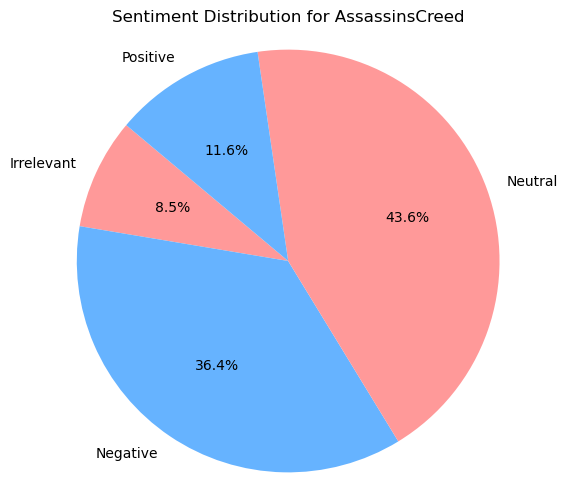

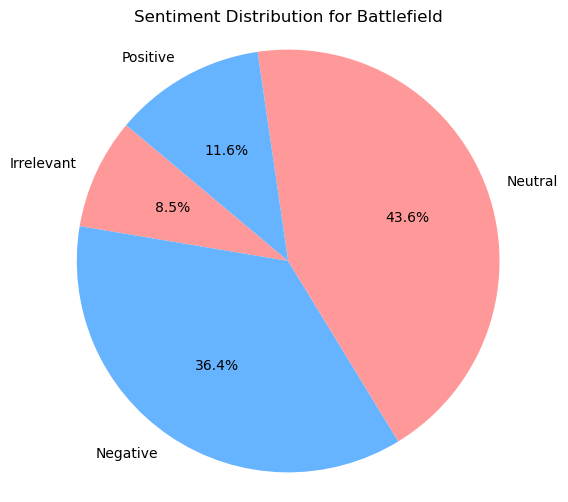

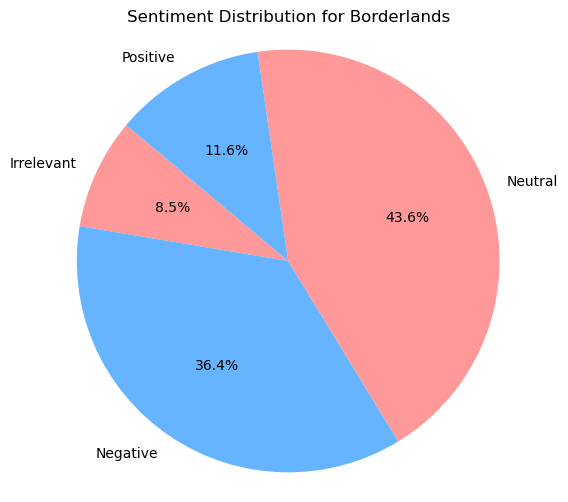

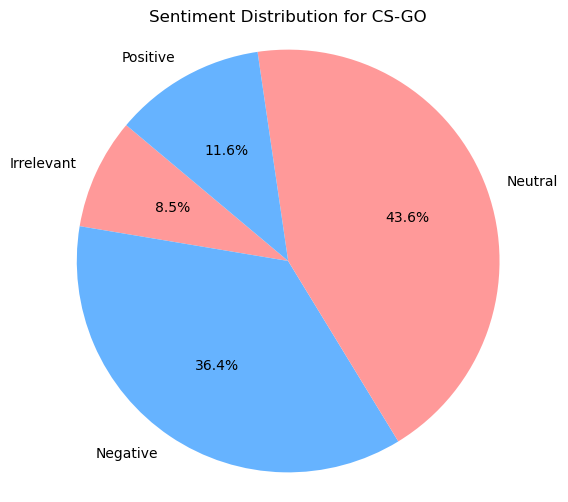

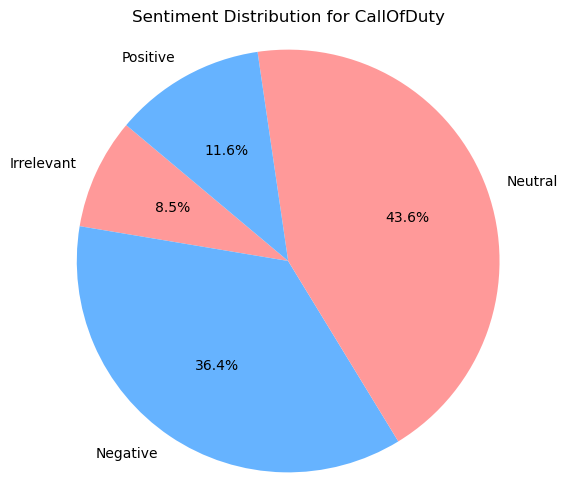

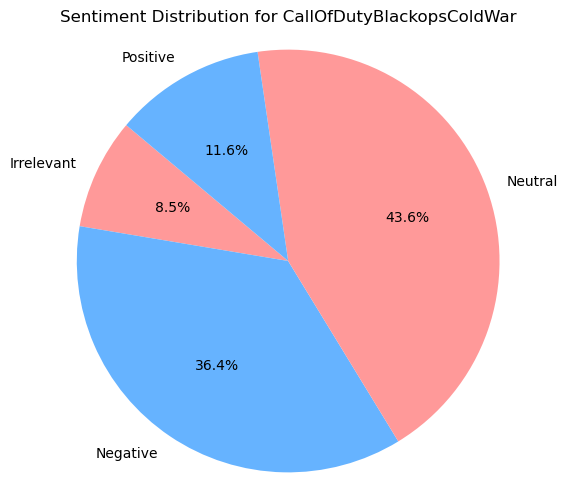

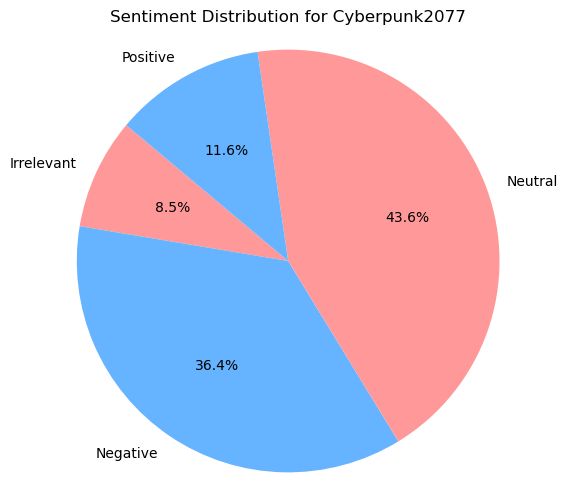

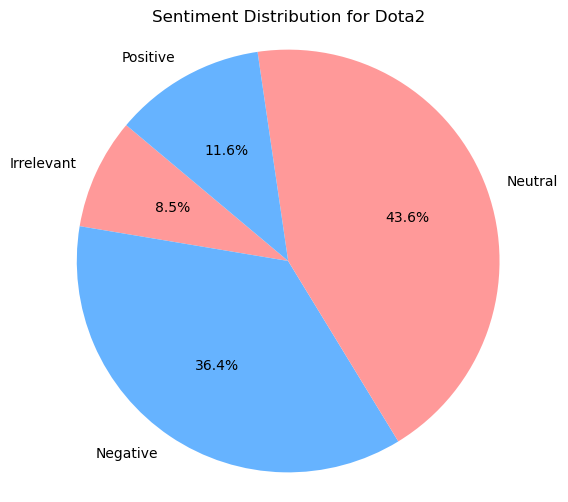

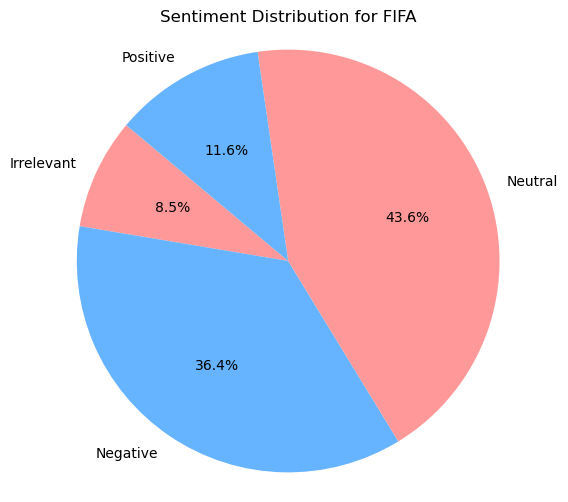

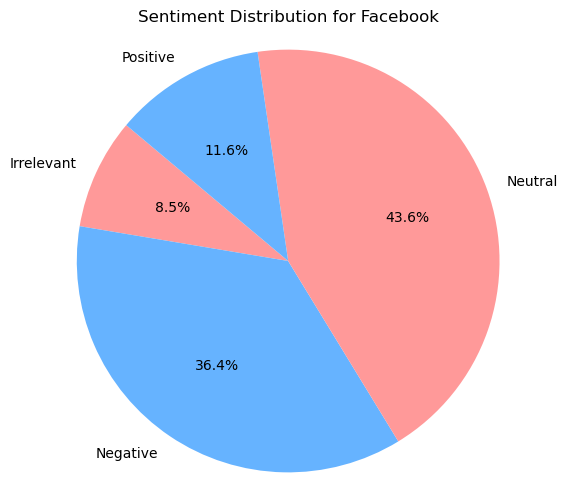

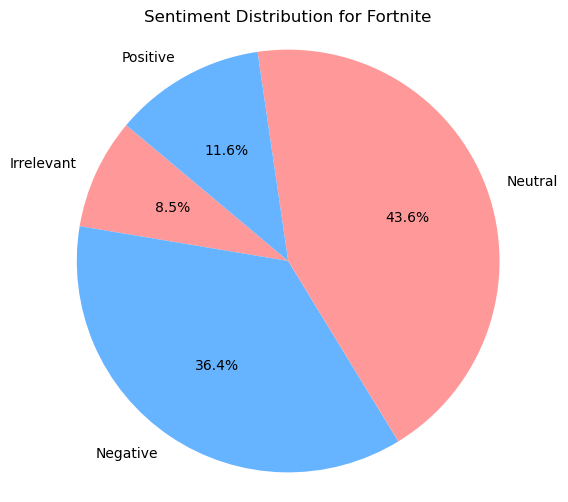

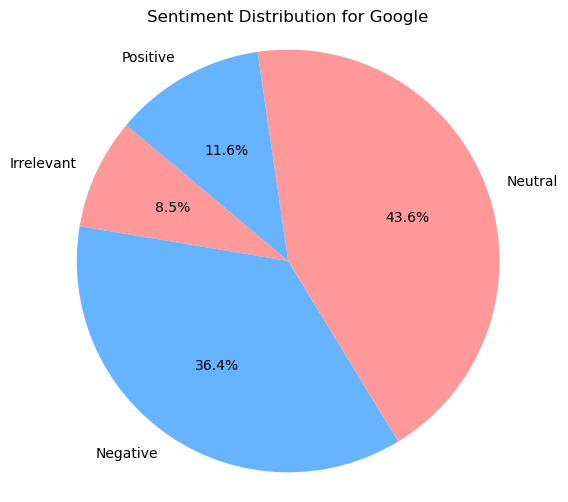

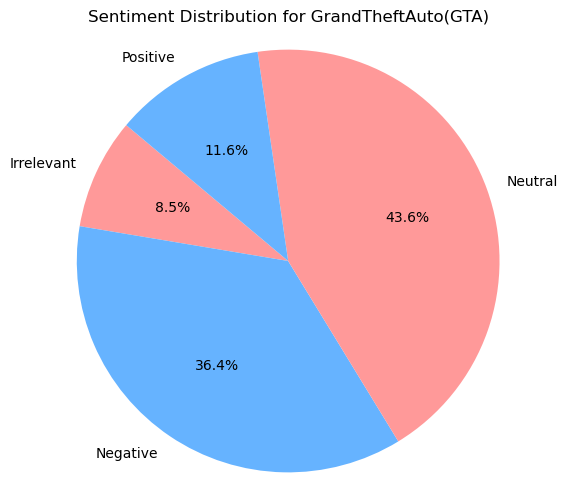

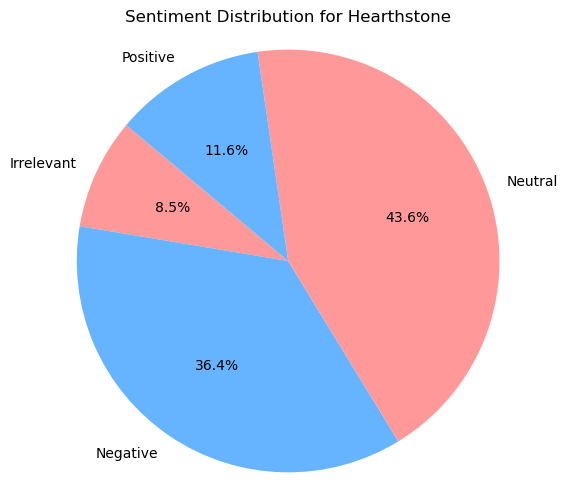

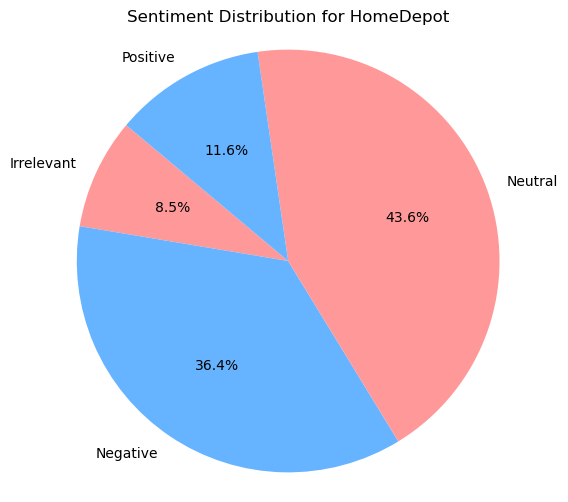

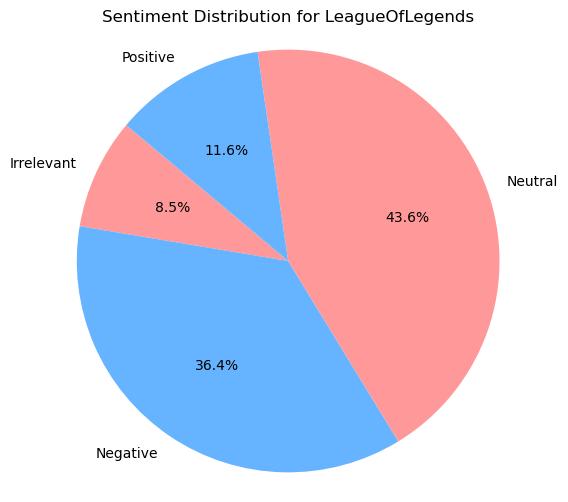

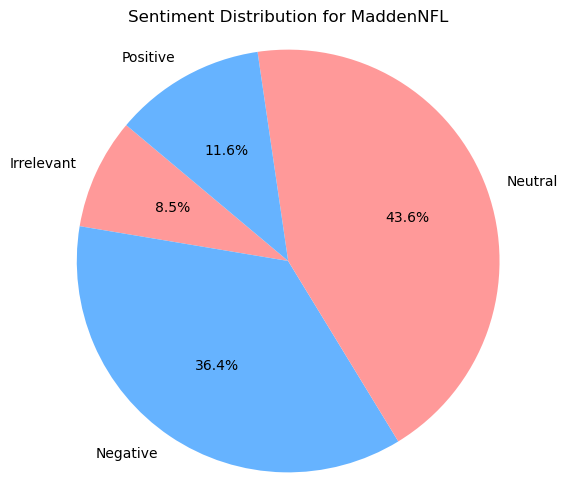

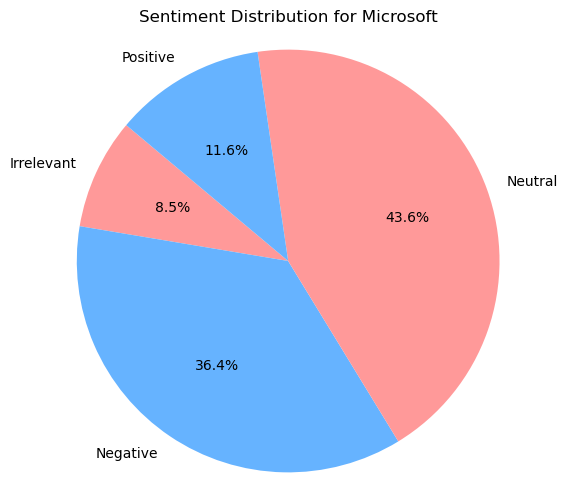

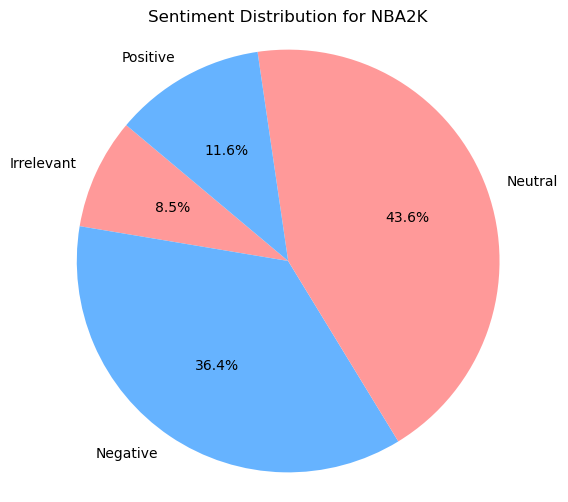

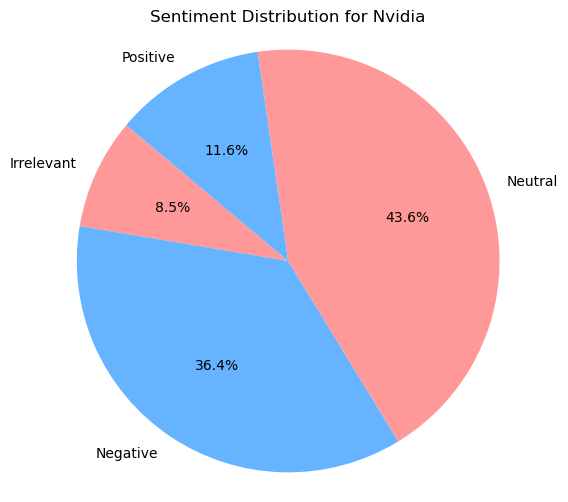

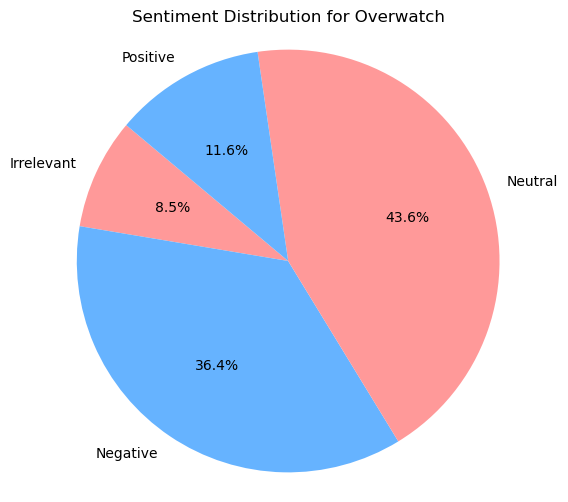

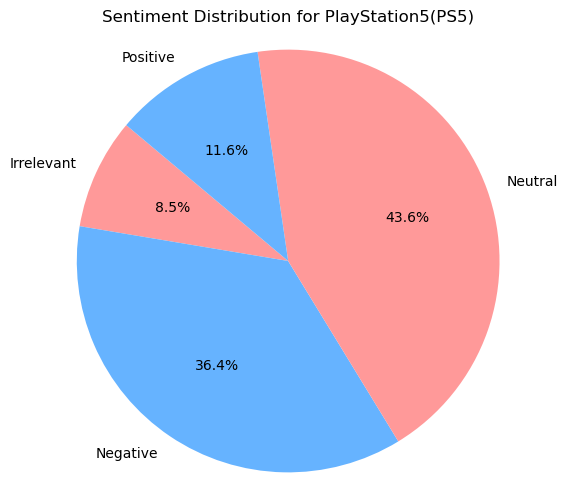

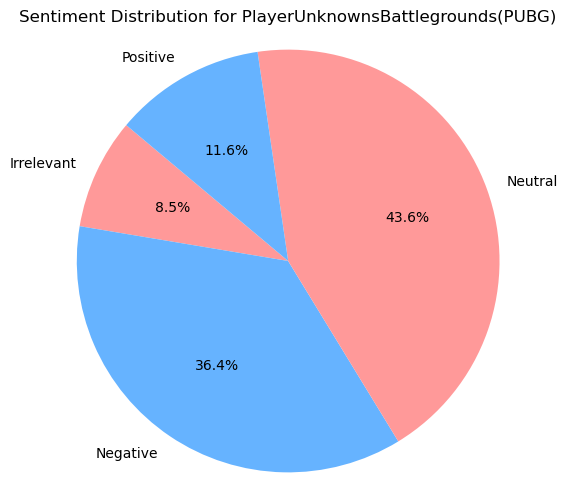

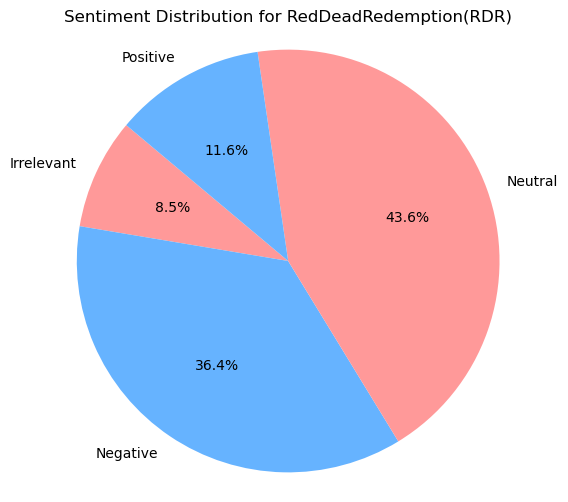

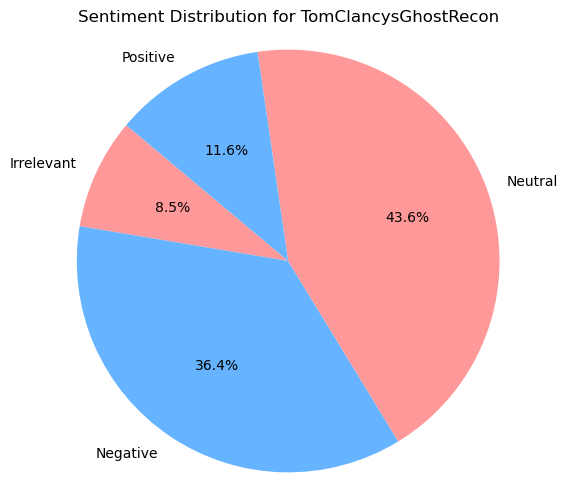

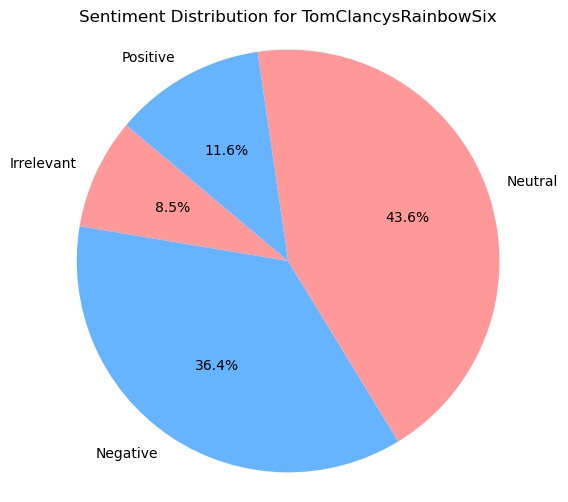

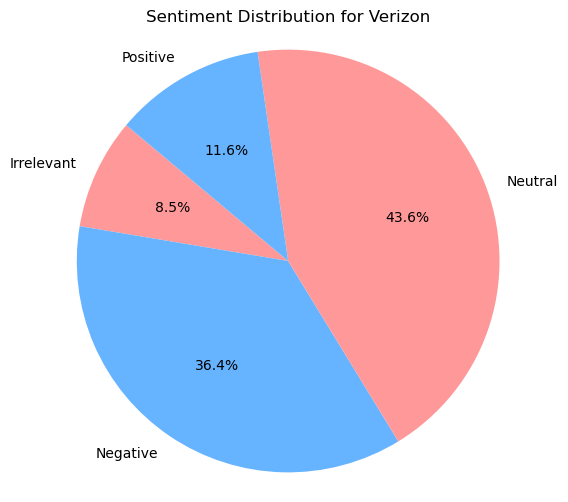

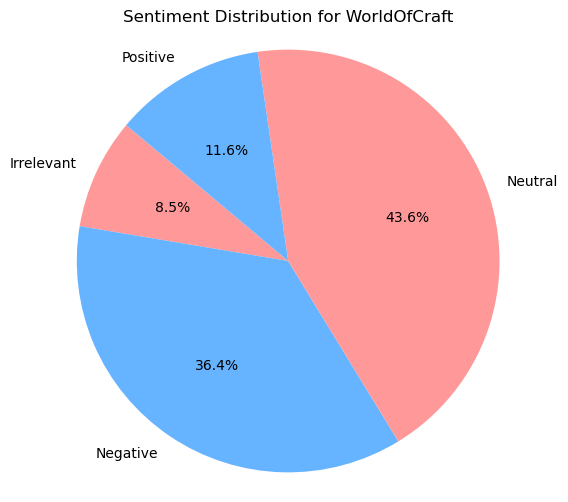

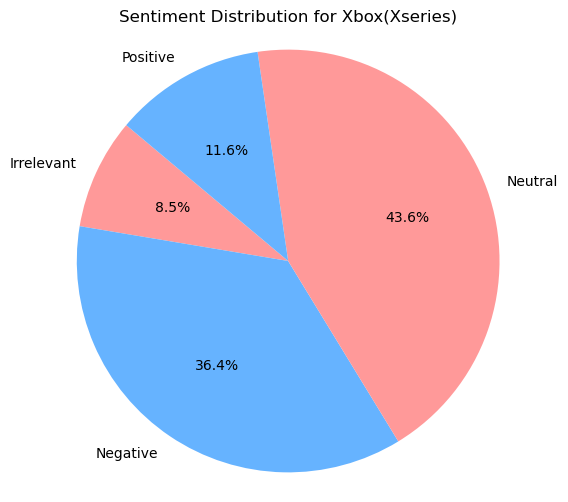

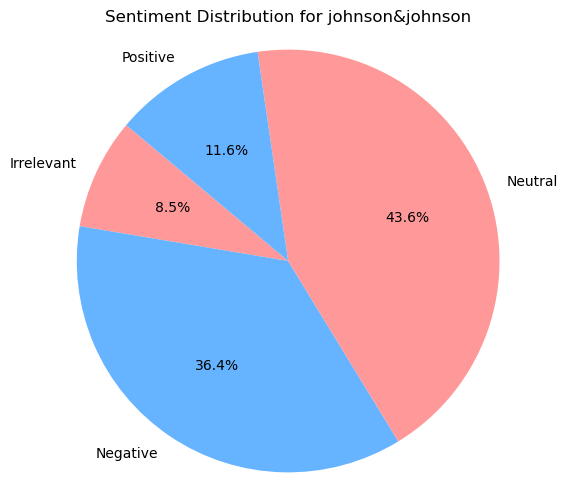

In [43]:
#Pie Chart
topics=sentiment_counts.index
for topic in topics:
    plt.figure(figsize=(6,6))
    plt.pie(sentiment_counts.loc[Topic],labels=sentiment_counts.columns,autopct='%1.1f%%',startangle=140,colors=['#ff9999','#66b3ff'])
    plt.title(f"Sentiment Distribution for {topic}")
    plt.axis("equal")
    plt.show()


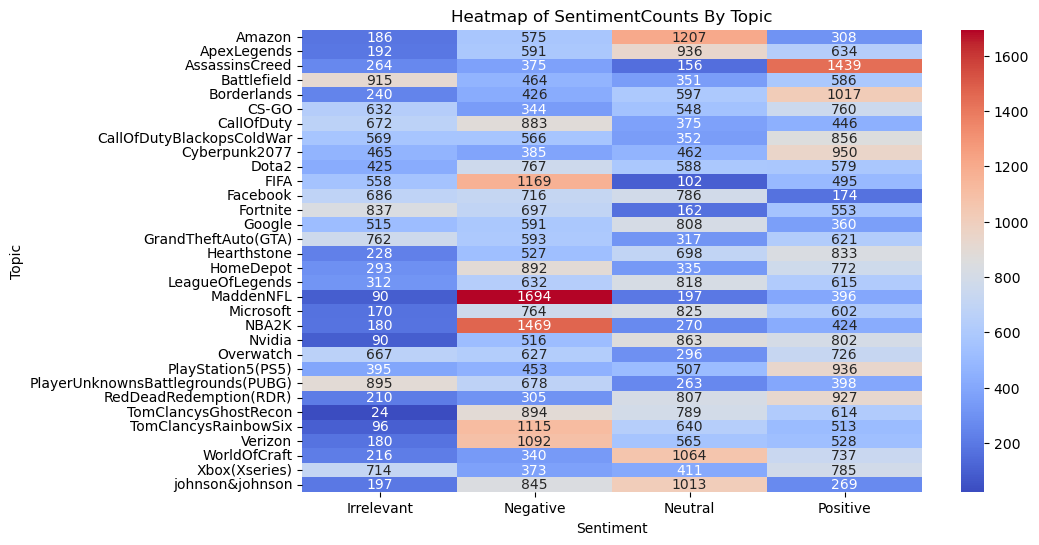

In [45]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(sentiment_counts,annot=True,fmt="d",cmap='coolwarm')
plt.title("Heatmap of SentimentCounts By Topic")
plt.xlabel("Sentiment")
plt.ylabel("Topic")
plt.show()

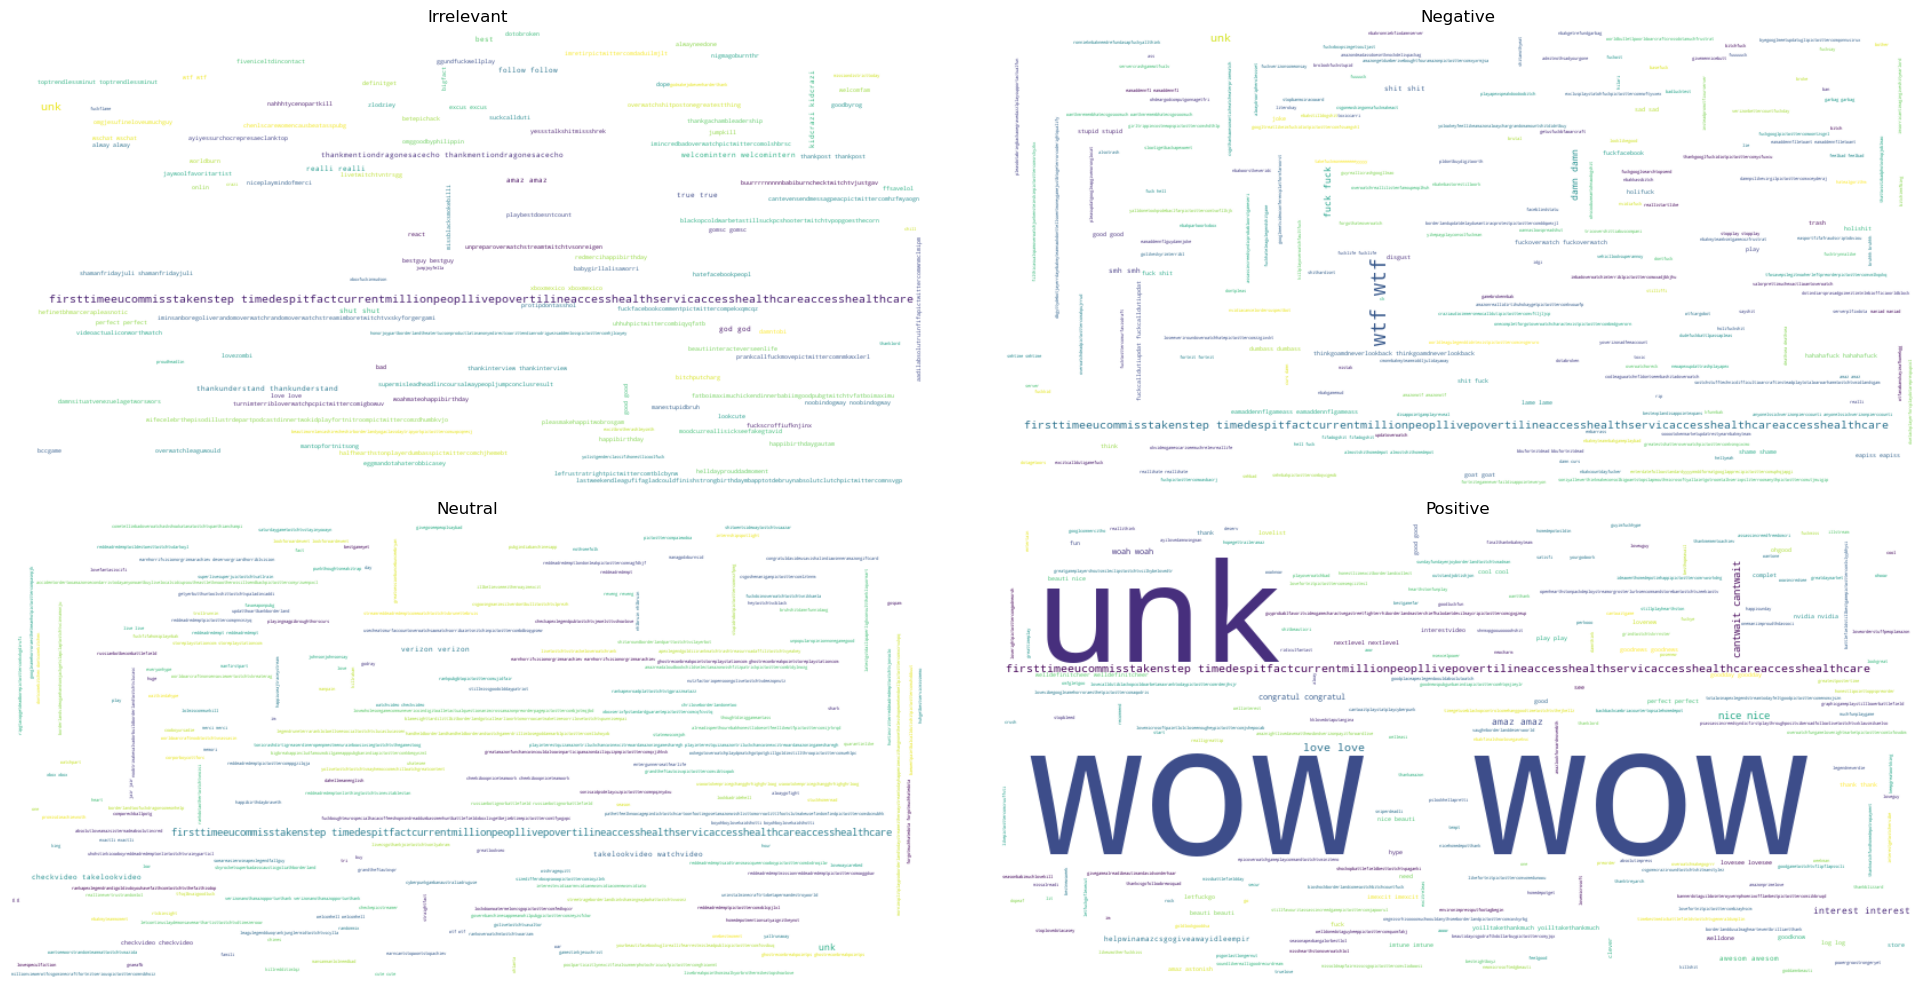

In [74]:
#WordCloud
from wordcloud import WordCloud
sentiments = ['Irrelevant', 'Negative', 'Neutral', 'Positive']
wordclouds = {}

for sentiment in sentiments:
    # Filter data by sentiment
    filtered_data = df[df['Sentiment'] == sentiment]
    
    # Join preprocessed text
    preprocessed_text = " ".join(filtered_data['preprocessed_text'])
    
    # Generate word cloud if text is not empty
    if preprocessed_text.strip():  # Check if there's any text to generate a word cloud
        wordclouds[sentiment] = WordCloud(width=800, height=400, background_color='white').generate(preprocessed_text)
    else:
        print(f"No data available for {sentiment} sentiment.")

# Plot the word clouds
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

for i, sentiment in enumerate(sentiments):
    if sentiment in wordclouds:  # Plot only if there's data available
        row = i // 2
        col = i % 2
        axs[row, col].imshow(wordclouds[sentiment], interpolation='bilinear')
        axs[row, col].set_title(sentiment)
        axs[row, col].axis('off')
    else:
        row = i // 2
        col = i % 2
        axs[row, col].axis('off')  # Hide empty subplot

plt.tight_layout()
plt.show()